# Machine Learning Engineer Nanodegree
## Supervised Learning
## Project 2: Building a Student Intervention System

Welcome to the second project of the Machine Learning Engineer Nanodegree! In this notebook, some template code has already been provided for you, and it will be your job to implement the additional functionality necessary to successfully complete this project. Sections that begin with **'Implementation'** in the header indicate that the following block of code will require additional functionality which you must provide. Instructions will be provided for each section and the specifics of the implementation are marked in the code block with a `'TODO'` statement. Please be sure to read the instructions carefully!

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.  

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

### Question 1 - Classification vs. Regression
*Your goal for this project is to identify students who might need early intervention before they fail to graduate. Which type of supervised learning problem is this, classification or regression? Why?*

**Answer: ** This is an example of classification of supervised learning. As the output is a discrete set of labels, that is to predict whether a student pass or fail before graduation, so student will need need early intervention before they fail to graduate. So, based on the output of our model, it will be categorized into classification, in which we have a discrete set of labels of output and out model will predict the correct value of that. 

## Exploring the Data
Run the code cell below to load necessary Python libraries and load the student data. Note that the last column from this dataset, `'passed'`, will be our target label (whether the student graduated or didn't graduate). All other columns are features about each student.

In [128]:
# Import libraries
import numpy as np
import pandas as pd
from time import time
from sklearn.metrics import f1_score

# Read student data
student_data = pd.read_csv("student-data.csv")
print "Student data read successfully!"

Student data read successfully!


### Implementation: Data Exploration
Let's begin by investigating the dataset to determine how many students we have information on, and learn about the graduation rate among these students. In the code cell below, you will need to compute the following:
- The total number of students, `n_students`.
- The total number of features for each student, `n_features`.
- The number of those students who passed, `n_passed`.
- The number of those students who failed, `n_failed`.
- The graduation rate of the class, `grad_rate`, in percent (%).


In [129]:
# TODO: Calculate number of students
n_students = len(student_data.axes[0])

# TODO: Calculate number of features
n_features = len(student_data.axes[1]) - 1 # Subtracted one because dataframe contains target column too. 

# TODO: Calculate passing students
n_passed = sum(student_data['passed'] == 'yes')

# TODO: Calculate failing students
n_failed = sum(student_data['passed'] == 'no')

# TODO: Calculate graduation rate
grad_rate = (n_passed/float(n_students))*100

# Print the results
print "Total number of students: {}".format(n_students)
print "Number of features: {}".format(n_features)
print "Number of students who passed: {}".format(n_passed)
print "Number of students who failed: {}".format(n_failed)
print "Graduation rate of the class: {:.2f}%".format(grad_rate)

Total number of students: 395
Number of features: 30
Number of students who passed: 265
Number of students who failed: 130
Graduation rate of the class: 67.09%


## Preparing the Data
In this section, we will prepare the data for modeling, training and testing.

### Identify feature and target columns
It is often the case that the data you obtain contains non-numeric features. This can be a problem, as most machine learning algorithms expect numeric data to perform computations with.

Run the code cell below to separate the student data into feature and target columns to see if any features are non-numeric.

In [130]:
# Extract feature columns
feature_cols = list(student_data.columns[:-1])

# Extract target column 'passed'
target_col = student_data.columns[-1] 

# Show the list of columns
print "Feature columns:\n{}".format(feature_cols)
print "\nTarget column: {}".format(target_col)

# Separate the data into feature data and target data (X_all and y_all, respectively)
X_all = student_data[feature_cols]
y_all = student_data[target_col]

# Show the feature information by printing the first five rows
print "\nFeature values:"
print X_all.head()

Feature columns:
['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu', 'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime', 'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences']

Target column: passed

Feature values:
  school sex  age address famsize Pstatus  Medu  Fedu     Mjob      Fjob  \
0     GP   F   18       U     GT3       A     4     4  at_home   teacher   
1     GP   F   17       U     GT3       T     1     1  at_home     other   
2     GP   F   15       U     LE3       T     1     1  at_home     other   
3     GP   F   15       U     GT3       T     4     2   health  services   
4     GP   F   16       U     GT3       T     3     3    other     other   

    ...    higher internet  romantic  famrel  freetime goout Dalc Walc health  \
0   ...       yes       no        no       4         3     4    1    1      3   
1   ...       

### Preprocess Feature Columns

As you can see, there are several non-numeric columns that need to be converted! Many of them are simply `yes`/`no`, e.g. `internet`. These can be reasonably converted into `1`/`0` (binary) values.

Other columns, like `Mjob` and `Fjob`, have more than two values, and are known as _categorical variables_. The recommended way to handle such a column is to create as many columns as possible values (e.g. `Fjob_teacher`, `Fjob_other`, `Fjob_services`, etc.), and assign a `1` to one of them and `0` to all others.

These generated columns are sometimes called _dummy variables_, and we will use the [`pandas.get_dummies()`](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.get_dummies.html?highlight=get_dummies#pandas.get_dummies) function to perform this transformation. Run the code cell below to perform the preprocessing routine discussed in this section.

In [131]:
def preprocess_features(X):
    ''' Preprocesses the student data and converts non-numeric binary variables into
        binary (0/1) variables. Converts categorical variables into dummy variables. '''
    
    # Initialize new output DataFrame
    output = pd.DataFrame(index = X.index)

    # Investigate each feature column for the data
    for col, col_data in X.iteritems():
        
        # If data type is non-numeric, replace all yes/no values with 1/0
        if col_data.dtype == object:
            col_data = col_data.replace(['yes', 'no'], [1, 0])

        # If data type is categorical, convert to dummy variables
        if col_data.dtype == object:
            # Example: 'school' => 'school_GP' and 'school_MS'
            col_data = pd.get_dummies(col_data, prefix = col)  
        
        # Collect the revised columns
        output = output.join(col_data)
    
    return output

X_all = preprocess_features(X_all)
print "Processed feature columns ({} total features):\n{}".format(len(X_all.columns), list(X_all.columns))

Processed feature columns (48 total features):
['school_GP', 'school_MS', 'sex_F', 'sex_M', 'age', 'address_R', 'address_U', 'famsize_GT3', 'famsize_LE3', 'Pstatus_A', 'Pstatus_T', 'Medu', 'Fedu', 'Mjob_at_home', 'Mjob_health', 'Mjob_other', 'Mjob_services', 'Mjob_teacher', 'Fjob_at_home', 'Fjob_health', 'Fjob_other', 'Fjob_services', 'Fjob_teacher', 'reason_course', 'reason_home', 'reason_other', 'reason_reputation', 'guardian_father', 'guardian_mother', 'guardian_other', 'traveltime', 'studytime', 'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences']


### Implementation: Training and Testing Data Split
So far, we have converted all _categorical_ features into numeric values. For the next step, we split the data (both features and corresponding labels) into training and test sets. In the following code cell below, you will need to implement the following:
- Randomly shuffle and split the data (`X_all`, `y_all`) into training and testing subsets.
  - Use 300 training points (approximately 75%) and 95 testing points (approximately 25%).
  - Set a `random_state` for the function(s) you use, if provided.
  - Store the results in `X_train`, `X_test`, `y_train`, and `y_test`.

In [132]:
# TODO: Import any additional functionality you may need here
from sklearn.cross_validation import train_test_split

# TODO: Set the number of training points
num_train = 300
l_test_size = (n_students - num_train) / float(n_students)
# Set the number of testing points
num_test = X_all.shape[0] - num_train

# TODO: Shuffle and split the dataset into the number of training and testing points above
X_train, X_test, y_train, y_test = train_test_split(X_all, y_all, test_size=l_test_size, random_state=34)

# Show the results of the split
print "Training set has {} samples.".format(X_train.shape[0])
print "Testing set has {} samples.".format(X_test.shape[0])


Training set has 300 samples.
Testing set has 95 samples.


## Training and Evaluating Models
In this section, you will choose 3 supervised learning models that are appropriate for this problem and available in `scikit-learn`. You will first discuss the reasoning behind choosing these three models by considering what you know about the data and each model's strengths and weaknesses. You will then fit the model to varying sizes of training data (100 data points, 200 data points, and 300 data points) and measure the F<sub>1</sub> score. You will need to produce three tables (one for each model) that shows the training set size, training time, prediction time, F<sub>1</sub> score on the training set, and F<sub>1</sub> score on the testing set.

### Question 2 - Model Application
*List three supervised learning models that are appropriate for this problem. What are the general applications of each model? What are their strengths and weaknesses? Given what you know about the data, why did you choose these models to be applied?*

**Answer: ** I would like to choose SVM, Naive Bayes, and Decision tree supervised learning models. Some of pros and cons of these models are described below,

***For SVM:***
    It will perform well for higher dimensions, will perform pretty well when a number of dimensions are greater than the number of samples, uses some of the training points for hypothesis function so memory efficient and is pretty alterable that is it can be used with different kernel functions. 
   
   Some of its disadvantages are it will not perform when a number of examples are much lower than a number of features, and for getting probability estimates are pretty computationally expensive. 
   

***For Naive Bayes classifier:***
    Some of its advantages are that this is pretty easy to implement as compared to other models, extremely simple, and less computationally expensive. 
    
    Some of the disadvantages of Naive Bayes model are, We cannot use them when there exist correlation among different features in our data and will not perform well when their features are not independent that violates fundamental assumption for them. 
    

***For Decision trees***
    Some of the advantegs of using decision tree classifier are they are pretty easy to interpret for humans, easy to implement, fast, and has fewer parameters to tune. 
    
    Some of its disadvantages are they are easily vulnerable for overfitting, and their computational complexity scales exponentially as the problem scope increases. 
    
Given information about data like a number of features equals to 30 and around training set consist of 300 instances, I have chosen these three methods because, for the SVM, it will easily train with that large number of features, will generalize better. 
For the second choice of Naive Bayes, I have chosen because of its less computational expensive nature considering 300 examples of 30 features data and simplicity that complies with Occam Razor. 
For the third choice of decision trees, it is easily interpretable latter which yields latter insights for the human reader and can be manually configurable.

I referred to below-mentioned sources for above answer
( https://pratanalytics.wordpress.com/2014/11/25/pros-and-cons-of-classifiers/)
( http://scikit-learn.org/stable/modules/svm.html)

### Setup
Run the code cell below to initialize three helper functions which you can use for training and testing the three supervised learning models you've chosen above. The functions are as follows:
- `train_classifier` - takes as input a classifier and training data and fits the classifier to the data.
- `predict_labels` - takes as input a fit classifier, features, and a target labeling and makes predictions using the F<sub>1</sub> score.
- `train_predict` - takes as input a classifier, and the training and testing data, and performs `train_clasifier` and `predict_labels`.
 - This function will report the F<sub>1</sub> score for both the training and testing data separately.

In [133]:
def train_classifier(clf, X_train, y_train):
    ''' Fits a classifier to the training data. '''
    
    # Start the clock, train the classifier, then stop the clock
    start = time()
    clf.fit(X_train, y_train)
    end = time()
    
    # Print the results
    print "Trained model in {:.4f} seconds".format(end - start)

    
def predict_labels(clf, features, target):
    ''' Makes predictions using a fit classifier based on F1 score. '''
    
    # Start the clock, make predictions, then stop the clock
    start = time()
    y_pred = clf.predict(features)
    end = time()
    
    # Print and return results
    print "Made predictions in {:.4f} seconds.".format(end - start)
    return f1_score(target.values, y_pred, pos_label='yes')


def train_predict(clf, X_train, y_train, X_test, y_test):
    ''' Train and predict using a classifer based on F1 score. '''
    
    # Indicate the classifier and the training set size
    print "Training a {} using a training set size of {}. . .".format(clf.__class__.__name__, len(X_train))
    
    # Train the classifier
    train_classifier(clf, X_train, y_train)
    
    # Print the results of prediction for both training and testing
    print "F1 score for training set: {:.4f}.".format(predict_labels(clf, X_train, y_train))
    print "F1 score for test set: {:.4f}.".format(predict_labels(clf, X_test, y_test))

### Implementation: Model Performance Metrics
With the predefined functions above, you will now import the three supervised learning models of your choice and run the `train_predict` function for each one. Remember that you will need to train and predict on each classifier for three different training set sizes: 100, 200, and 300. Hence, you should expect to have 9 different outputs below — 3 for each model using the varying training set sizes. In the following code cell, you will need to implement the following:
- Import the three supervised learning models you've discussed in the previous section.
- Initialize the three models and store them in `clf_A`, `clf_B`, and `clf_C`.
 - Use a `random_state` for each model you use, if provided.
 - **Note:** Use the default settings for each model — you will tune one specific model in a later section.
- Create the different training set sizes to be used to train each model.
 - *Do not reshuffle and resplit the data! The new training points should be drawn from `X_train` and `y_train`.*
- Fit each model with each training set size and make predictions on the test set (9 in total).  
**Note:** Three tables are provided after the following code cell which can be used to store your results.

In [134]:
# TODO: Import the three supervised learning models from sklearn
# from sklearn import model_A
from sklearn import svm
# from sklearn import model_B
from sklearn.naive_bayes import GaussianNB
# from skearln import model_C
from sklearn.tree import DecisionTreeClassifier

#from sklearn.ensemble import BaggingClassifier
#from sklearn.neighbors import KNeighborsClassifier
#clf_D = BaggingClassifier(DecisionTreeClassifier(max_depth = 1,random_state=0), max_samples=0.75, max_features=0.75)
# TODO: Initialize the three models
clf_A = svm.SVC()
clf_B = GaussianNB()
clf_C = DecisionTreeClassifier(max_depth = 4,random_state=0) # to avoid overfitting I have chosedn max_depth to 4

# TODO: Set up the training set sizes
X_train_100 = 100
y_train_100 = 100

X_train_200 = 200
y_train_200 = 200

X_train_300 = 300
y_train_300 = 300

# TODO: Execute the 'train_predict' function for each classifier and each training set size
# train_predict(clf, X_train, y_train, X_test, y_test)
train_predict(clf_A, X_train[:X_train_100], y_train[:y_train_100], X_test, y_test)
train_predict(clf_A, X_train[:X_train_200], y_train[:y_train_200], X_test, y_test)
train_predict(clf_A, X_train[:X_train_300], y_train[:y_train_300], X_test, y_test)

train_predict(clf_B, X_train[:X_train_100], y_train[:y_train_100], X_test, y_test)
train_predict(clf_B, X_train[:X_train_200], y_train[:y_train_200], X_test, y_test)
train_predict(clf_B, X_train[:X_train_300], y_train[:y_train_300], X_test, y_test)

train_predict(clf_C, X_train[:X_train_100], y_train[:y_train_100], X_test, y_test)
train_predict(clf_C, X_train[:X_train_200], y_train[:y_train_200], X_test, y_test)
train_predict(clf_C, X_train[:X_train_300], y_train[:y_train_300], X_test, y_test)

Training a SVC using a training set size of 100. . .
Trained model in 0.0040 seconds
Made predictions in 0.0020 seconds.
F1 score for training set: 0.8736.
Made predictions in 0.0020 seconds.
F1 score for test set: 0.7975.
Training a SVC using a training set size of 200. . .
Trained model in 0.0090 seconds
Made predictions in 0.0060 seconds.
F1 score for training set: 0.8738.
Made predictions in 0.0030 seconds.
F1 score for test set: 0.8212.
Training a SVC using a training set size of 300. . .
Trained model in 0.0190 seconds
Made predictions in 0.0130 seconds.
F1 score for training set: 0.8658.
Made predictions in 0.0040 seconds.
F1 score for test set: 0.8000.
Training a GaussianNB using a training set size of 100. . .
Trained model in 0.0020 seconds
Made predictions in 0.0010 seconds.
F1 score for training set: 0.4646.
Made predictions in 0.0010 seconds.
F1 score for test set: 0.3373.
Training a GaussianNB using a training set size of 200. . .
Trained model in 0.0030 seconds
Made pred

### Tabular Results
Edit the cell below to see how a table can be designed in [Markdown](https://github.com/adam-p/markdown-here/wiki/Markdown-Cheatsheet#tables). You can record your results from above in the tables provided.

** Classifer 1 - Support vector machine**  

| Training Set Size | Training Time | Prediction Time (test) | F1 Score (train) | F1 Score (test) |
| :---------------: | :---------------------: | :--------------------: | :--------------: | :-------------: |
| 100               |        0.0040           |           0.0020       |        0.8736    |    0.7975       |
| 200               |        0.0100           |           0.0060       |        0.8738    |    0.8212       |
| 300               |        0.0190           |           0.0130       |        0.8658    |    0.8000       |

** Classifer 2 - Naive Bayes**  

| Training Set Size | Training Time | Prediction Time (test) | F1 Score (train) | F1 Score (test) |
| :---------------: | :---------------------: | :--------------------: | :--------------: | :-------------: |
| 100               |     0.0030              |      0.0010            |     0.4646       |     0.3373      |
| 200               |     0.0030              |      0.0010            |     0.7810       |     0.7258      |
| 300               |     0.0040              |      0.0010            |     0.7971       |     0.7717      |

** Classifer 3 - Decision tree**  

| Training Set Size | Training Time | Prediction Time (test) | F1 Score (train) | F1 Score (test) |
| :---------------: | :---------------------: | :--------------------: | :--------------: | :-------------: |
| 100               |     0.0020              |      0.0000            |    0.9474        |     0.7218      |
| 200               |     0.0040              |      0.0000            |    0.8882        |     0.8235      |
| 300               |     0.0030              |      0.0000            |    0.8598        |     0.8000      |

## Choosing the Best Model
In this final section, you will choose from the three supervised learning models the *best* model to use on the student data. You will then perform a grid search optimization for the model over the entire training set (`X_train` and `y_train`) by tuning at least one parameter to improve upon the untuned model's F<sub>1</sub> score. 

### Question 3 - Chosing the Best Model
*Based on the experiments you performed earlier, in one to two paragraphs, explain to the board of supervisors what single model you chose as the best model. Which model is generally the most appropriate based on the available data, limited resources, cost, and performance?*

**Answer: ** Based on the three models initially selected, I would like to choose Decision tree model based on the its less cost, interpretability,its F1score and efficient resource utilization of all of the three models. As F1 score are a good estimate of model accuracy, so based on the above three models, it will almost perform equally as compared to other models both on the training and testing dataset. When the training dataset contains fewer instances, it will become prone to overfitting that's  why it was giving a less F1 score on the initial training models and suffers from high variance problem. But as the number of training dataset increases, its accuracy increases and ultimately reaches 80 which is equivalent to best SVM testing F1 score, which indicates its good performance in predicting the output label. 

Based on available data, limited resources, cost, and performance, I would again choose Decision tree algorithm as its performance is almost equivalent to the Naive Bayes which is a pretty simple model and F1 score equivalent to SVM. When it comes to cost and resource utilization, its training and testing time are not too high comparing with SVM while giving a good value of
F1 score on the available data.  

### Question 4 - Model in Layman's Terms
*In one to two paragraphs, explain to the board of directors in layman's terms how the final model chosen is supposed to work. For example if you've chosen to use a decision tree or a support vector machine, how does the model go about making a prediction?*

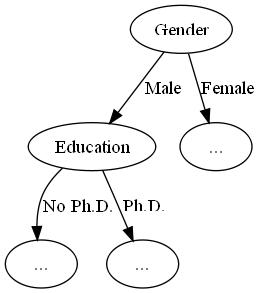

In [55]:
from IPython.display import Image
Image(filename='output1.png')


**Answer: ** Based on the above decision tree classifier built, I would rather explain them by visually presenting a simple version of a decision tree using first two or three nodes and then deciding based on the decision on these nodes. I would firstly give them a simple explanation of decision trees, and then traverse through two or three nodes of the actual decision tree to show them how our model work. For Decision tree simple explanation, I would explain that it consists of multiple decision nodes or paths through which you traverse to a final decision about output label. Like considering above simple decision tree I will explain to them that you will start from top node, and based on the condition on that node, you will go into that direction and then make the decision again based on the condition on that node until you reach the final output label. Like for above image, you will firstly decide that whether the gender of the student is Male or Female, let's say that it was Male. Then you will go the left side and then decide whether the education of a student is Ph.D. or No Ph.D. and let say for Ph.D. candidate the output label is failed, then I will explain to them that our model will predict label failed based on the above conditions. Then I will show them an actual image to get some idea that how our model is predicting based on the decision on different nodes. 


In [135]:
#Testing code for exporting model to dot file and visualizing in image
def visualize_tree(tree, feature_names):
    """Create tree png using graphviz.
    
    Args
    ----
    tree -- scikit-learn DecsisionTree.
    feature_names -- list of feature names.
    """
    import os
    import subprocess
    from sklearn.tree import export_graphviz
    with open("dt.dot", 'w') as f:
        export_graphviz(tree, out_file=f,
                        feature_names=feature_names)

    command = ["dot", "-Tpng", "dt.dot", "-o", "dt.png"]
    try:
        subprocess.check_call(command)
    except:
        exit("Could not run dot, ie graphviz, to "
             "produce visualization")
visualize_tree(clf_C, X_all.columns)

### Implementation: Model Tuning
Fine tune the chosen model. Use grid search (`GridSearchCV`) with at least one important parameter tuned with at least 3 different values. You will need to use the entire training set for this. In the code cell below, you will need to implement the following:
- Import [`sklearn.grid_search.gridSearchCV`](http://scikit-learn.org/stable/modules/generated/sklearn.grid_search.GridSearchCV.html) and [`sklearn.metrics.make_scorer`](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.make_scorer.html).
- Create a dictionary of parameters you wish to tune for the chosen model.
 - Example: `parameters = {'parameter' : [list of values]}`.
- Initialize the classifier you've chosen and store it in `clf`.
- Create the F<sub>1</sub> scoring function using `make_scorer` and store it in `f1_scorer`.
 - Set the `pos_label` parameter to the correct value!
- Perform grid search on the classifier `clf` using `f1_scorer` as the scoring method, and store it in `grid_obj`.
- Fit the grid search object to the training data (`X_train`, `y_train`), and store it in `grid_obj`.

In [137]:
# TODO: Import 'GridSearchCV' and 'make_scorer'
from sklearn.grid_search import GridSearchCV
from sklearn.metrics import make_scorer
# TODO: Create the parameters list you wish to tune
parameters = {'max_depth':list(range(1, 101))}

# TODO: Initialize the classifier
clf = DecisionTreeClassifier(random_state=0)

# TODO: Make an f1 scoring function using 'make_scorer' 
f1_scorer = make_scorer(f1_score,pos_label='yes')

# TODO: Perform grid search on the classifier using the f1_scorer as the scoring method
grid_obj = GridSearchCV(estimator= clf, param_grid= parameters,scoring=f1_scorer)

# TODO: Fit the grid search object to the training data and find the optimal parameters
grid_obj = grid_obj.fit(X_train,y_train)

# Get the estimator
clf = grid_obj.best_estimator_

# Report the final F1 score for training and testing after parameter tuning
print "Tuned model has a training F1 score of {:.4f}.".format(predict_labels(clf, X_train, y_train))
print "Tuned model has a testing F1 score of {:.4f}.".format(predict_labels(clf, X_test, y_test))

Made predictions in 0.0000 seconds.
Tuned model has a training F1 score of 0.8036.
Made predictions in 0.0000 seconds.
Tuned model has a testing F1 score of 0.8358.


### Question 5 - Final F<sub>1</sub> Score
*What is the final model's F<sub>1</sub> score for training and testing? How does that score compare to the untuned model?*

**Answer: ** Based on the final model F1 score. It improves its F1 from 80% to 83.58% and on the same side it makes it more resource efficient. Now it is taking much less time as compared to it used to take when initially build. So comparing to another model initially selected, its F1 score is pretty much improved, it is much more resource utilization efficient as compared to another model with similar F1 score e.g SVM. And the most beneficial point for adapting to Decision tree is because of its interpretability for the human reader. Although it was little prone to overfitting, but after grid searching, its high variance problem reduces and now it better generalizes to unseen examples on the expense of reducing the complexity of the model. 

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  
**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.